In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from seaborn import regplot
import statsmodels.api as sm
from mpl_toolkits import mplot3d

In [445]:
df = pd.read_csv("akinator.csv")
df.columns
df[['Taille (cm)', 'Taille de pied']].to_csv("aki 3.csv")

In [446]:
df = pd.read_csv("aki 2.csv", index_col="Unnamed: 0")

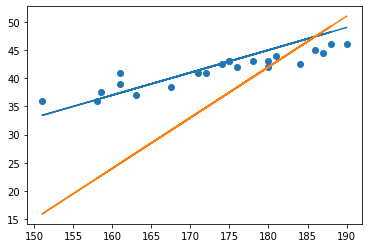

In [447]:
x = df["Taille (cm)"]
df["y_mes"] = df["Taille de pied"]

a1, b1 = 0.4, -27
df["y1"] = a1 * x + b1
a2, b2 = 0.9, -120
df["y2"] = a2 * x + b2


plt.figure()
plt.scatter(x,df["y_mes"])
plt.plot(x, df["y1"])
plt.plot(x, df["y2"])

R² = 1 – (Somme de 1 à n de (y_i – ^y_i)²)/(Somme de 1 à n de (y_i – y_barre)²)

<AxesSubplot:xlabel='Taille (cm)', ylabel='y_mes'>

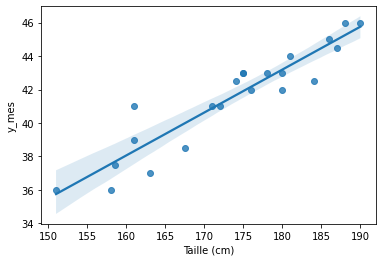

In [448]:
regplot(x=x, y=df["y_mes"])

In [449]:
def r2_calc(y1,y2):
    return (1 - ((y1 - y2)**2).sum() / ((y1 - y1.mean())**2).sum())

In [450]:
r2_calc(df["y_mes"], df["y1"])

0.5126369923745342

In [451]:
r2_calc(df["y_mes"], df["y2"])

-7.9022947331087

In [452]:
#test numpy array
((np.array([1,2,3]) - np.array([2,3,4])) ** 2).sum()

3

In [453]:
#Recupération des coeficients a et b
X = sm.add_constant(x)
mod = sm.OLS(df["y_mes"], X)
res = mod.fit()
a = res.params[1]
b = res.params[0]
a,b

(0.2567859952793077, -3.0296429082325957)

<AxesSubplot:xlabel='Taille (cm)', ylabel='y_mes'>

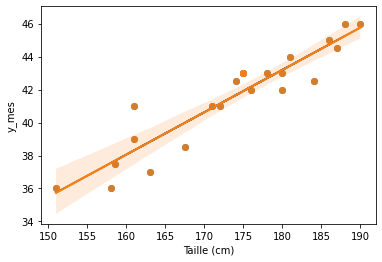

In [454]:
#Vérification que a et b retrouvent la même tendance que seaborn regplot
plt.plot(x, x * a + b)
plt.scatter(x,df["y_mes"])
regplot(x=x, y=df["y_mes"])

In [455]:
r2_score(df["y_mes"], df["y2"])

-7.9022947331087

Optionnel: Pour a compris entre [-1, 9] et b compris [0, 10], calculer R2

Tracer R2 sur un graphique en 3D en fonction de a et b

In [456]:
a_s = np.arange(-1, 10, 0.5)
b_s = np.arange(-4, 7, 0.5)
A = np.arange(0.220, 0.270, 0.001)
B = np.arange(-8, 3, 0.5)

In [457]:
A, B = np.meshgrid(A, B)
(A.shape, B.shape, x.shape)

((22, 51), (22, 51), (22,))

In [458]:
x = np.array(x)

In [459]:
Y = (A.T * x + B.T).T
Y.shape
r2 = r2_score(df["y_mes"], Y)

ValueError: y_true and y_pred have different number of output (1!=51)

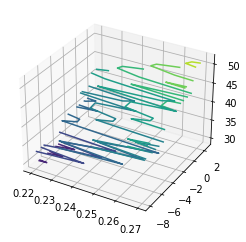

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(A,B,Y)